# Heart Disease Prediction using Logistic Regression

Description: This script uses logistic regression to predict the likelihood of heart disease based on various factors. World Health Organization has estimated that four out of five cardiovascular disease (CVD) deaths are due to heart attacks. This whole research inteds to pinpoint the ratio of patients who possess a good chance of being affected by CVD and also to predict the overall risk using Logistic Regression

In [8]:
# Importing Library
import pandas as pd
import numpy as np
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation
The dataset is from an ongoing cardiovascular study on residents od the town of Framingham, Massachusetts.

### Goal
Classification: predict whether the patient has 10-year risk of future coronary heart disease

### About
The dataset provides the patient's information. It includes over 4000 records and 15 attributes

In [4]:
# Loading Dataset
disease_df = pd.read_csv("../dataset/framingham.csv")
disease_df.drop(['education'], inplace = True, axis = 1)
disease_df.rename(columns = {'male':'Sex_male'}, inplace = True)

In [6]:
# Handling Missing Values
# Removing NaN/Null values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

In [9]:
# Splitting the Dataset into Train and Test Sets

X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

In [11]:
# Train and Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

print('Train Set:', X_train.shape, y_train.shape)
print('Test Set:', X_test.shape, y_test.shape)

Train Set: (2625, 6) (2625,)
Test Set: (1126, 6) (1126,)


## Data Exploration

/tmp/ipykernel_32327/1224180397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df, palette="BuGn_r")


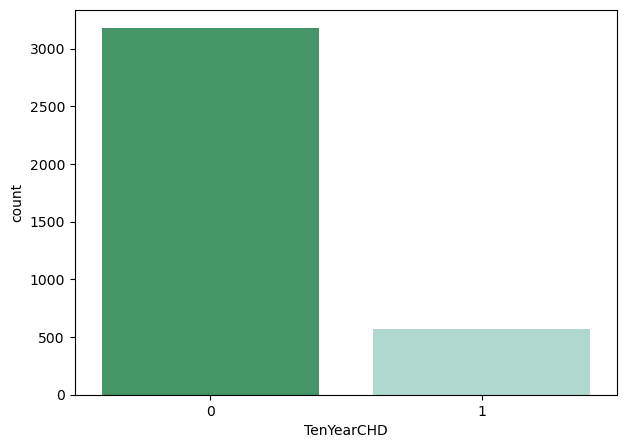

In [12]:
# Counting number of patients affected with CHD
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=disease_df, palette="BuGn_r")

plt.show()

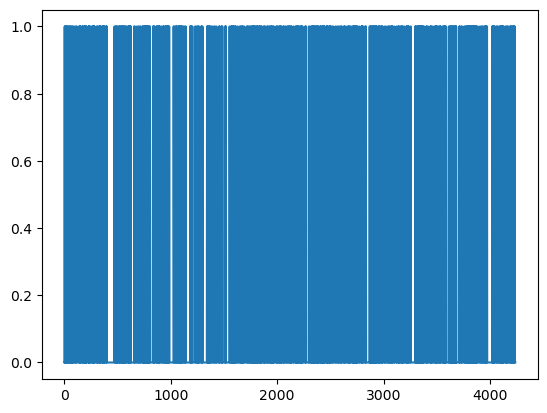

In [13]:
# Counting number of patients affected by CHD where (0 = Not Affected, 1 = Affected)
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)